In [1]:
# removing duplicate images using hashing referenced from: https://www.youtube.com/watch?v=AIyJSGmkFXk
# importing libraries for removing duplicate images
import hashlib
from hashlib import md5
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir

In [2]:
cwd=os.getcwd()
#print(cwd)
if 'good_bad_carton_images' not in cwd:
    os.chdir(cwd+'\\good_bad_carton_images')
cwd=os.getcwd()
print(cwd)

C:\Users\LeeX\Desktop\Proof_Of_Concept\good_bad_carton_images


duplicates in  internal_bad : 
0  duplicates
[] 

duplicates in  internal_good : 
0  duplicates
[] 

duplicates in  webscraped_bad : 
Example:


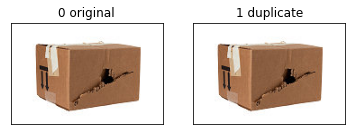

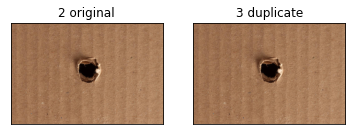

3  duplicates
[(1, 0), (3, 2), (329, 328)] 

duplicates in  webscraped_good : 
0  duplicates
[] 



In [12]:
# loop through each of the folder in good_bad_carton_images, 
# and loop through each of the files within each folder to check for duplicates

for folder_name in listdir(cwd):
    print('duplicates in ',folder_name,': ')
    
    duplicates_list=[] #create list of duplicates
    hash_keys={} #create dictionary to keep track of unique images
    
    os.chdir(cwd+'\\'+folder_name) #change directory to the subfolder containing the image files
    
    for index, filename in enumerate(os.listdir()):
        if os.path.isfile(filename): #ensure it is a filename and it exists and not a folder
            with open(filename,'rb') as f: #rb means read binary; jpg, png image files are in binary file formats
                filehash = hashlib.md5(f.read()).hexdigest() #creating filehash - unique identifier for image
                
            if filehash not in hash_keys: #add to hash_keys dict if filehash is not in the keys of the dictionary
                hash_keys[filehash]=index #filehash is the key, index is the value 
                
            else: #if filehash is already in the keys of the dictionary
                duplicates_list.append((index, hash_keys[filehash]))#add tuple to list of duplicates
    
    files_list=os.listdir() # contain list of all images inside subfolder
    
    if duplicates_list!=[]: print('Example:')
    
    for file_indexes in duplicates_list[:2]:
        try:
            plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
            plt.title(str(file_indexes[1]) + ' original'), plt.xticks([]), plt.yticks([])
            
            plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
            plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
            
            plt.show()
        except OSError as e:
            continue
            
    print(len(duplicates_list),' duplicates') # show number of duplicates in each folder
    print(duplicates_list,'\n') # show duplicates in each folder: [(index of duplicate copy,index of original copy),...]

In [13]:
# same code as above, with some changes to remove the duplicates instead of printing them

for folder_name in listdir(cwd):
    
    duplicates_list=[] #create list of duplicates
    hash_keys={} #create dictionary to keep track of unique images
    
    os.chdir(cwd+'\\'+folder_name) #change directory to the subfolder containing the image files
    
    for index, filename in enumerate(os.listdir()):
        if os.path.isfile(filename): #ensure it is a filename and it exists and not a folder
            with open(filename,'rb') as f: #rb means read binary; jpg, png image files are in binary file formats
                filehash = hashlib.md5(f.read()).hexdigest() #creating filehash - unique identifier for image
                
            if filehash not in hash_keys: #add to hash_keys dict if filehash is not in the keys of the dictionary
                hash_keys[filehash]=index #filehash is the key, index is the value 
                
            else: #if filehash is already in the keys of the dictionary, means is duplicate
                duplicates_list.append((index, hash_keys[filehash]))#add tuple to list of duplicates
                
    files_list=os.listdir()
    for index in duplicates_list:
        #print(folder_name,index)
        os.remove(files_list[index[0]])

In [14]:
# run this to check that duplicates have been successfully deleted, i.e. number of duplicates should be 0 now

for folder_name in listdir(cwd):
    print('duplicates in ',folder_name,': ')
    
    duplicates_list=[] #create list of duplicates
    hash_keys={} #create dictionary to keep track of unique images
    
    os.chdir(cwd+'\\'+folder_name) #change directory to the subfolder containing the image files
    
    for index, filename in enumerate(os.listdir()):
        if os.path.isfile(filename): #ensure it is a filename and it exists and not a folder
            with open(filename,'rb') as f: #rb means read binary; jpg, png image files are in binary file formats
                filehash = hashlib.md5(f.read()).hexdigest() #creating filehash - unique identifier for image
                
            if filehash not in hash_keys: #add to hash_keys dict if filehash is not in the keys of the dictionary
                hash_keys[filehash]=index #filehash is the key, index is the value 
                
            else: #if filehash is already in the keys of the dictionary
                duplicates_list.append((index, hash_keys[filehash]))#add tuple to list of duplicates
                
    print(len(duplicates_list),' duplicates') # show number of duplicates in each folder
    print(duplicates_list,'\n') # show duplicates in each folder: [(index of duplicate copy,index of original copy),...]

duplicates in  internal_bad : 
0  duplicates
[] 

duplicates in  internal_good : 
0  duplicates
[] 

duplicates in  webscraped_bad : 
0  duplicates
[] 

duplicates in  webscraped_good : 
0  duplicates
[] 



In [ ]:
### remove duplicates in augmented_images

duplicates_list=[] #create list of duplicates
hash_keys={} #create dictionary to keep track of unique images
    
for index, filename in enumerate(os.listdir('augmented_images/')):
    if os.path.isfile(filename): #ensure it is a filename and it exists and not a folder
        with open(filename,'rb') as f: #rb means read binary; jpg, png image files are in binary file formats
            filehash = hashlib.md5(f.read()).hexdigest() #creating filehash - unique identifier for image
                
        if filehash not in hash_keys: #add to hash_keys dict if filehash is not in the keys of the dictionary
            hash_keys[filehash]=index #filehash is the key, index is the value 
                
        else: #if filehash is already in the keys of the dictionary
            duplicates_list.append((index, hash_keys[filehash]))#add tuple to list of duplicates
            
print(len(duplicates_list),' duplicates') # show number of duplicates in each folder
print(duplicates_list,'\n') # show duplicates in each folder: [(index of duplicate copy,index of original copy),...]